In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [3]:
working_dir = '/media/jswaney/Drive/Justin/organoid_phenotyping/datasets'
os.listdir(working_dir)

['cyto_labels_combined.npy',
 'cyto_profiles_combined.npy',
 'cyto_profiles_combined_samples.npy',
 'cyto_tsne_combined.npy',
 'd35_wt',
 'd60_wt',
 'niche_labels_combined.npy',
 'niche_proximities_combined.npy',
 'niche_proximities_samples.npy',
 'niche_proximity_combined.png',
 'niche_tsne_combined.npy',
 'old']

In [5]:
labels = np.load(os.path.join(working_dir, 'cyto_labels_combined.npy'))
np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32)

In [47]:
profiles = np.load(os.path.join(working_dir, 'cyto_profiles_combined.npy'))
organoid = np.load(os.path.join(working_dir, 'cyto_profiles_combined_samples.npy'))
x_tsne = np.load(os.path.join(working_dir, 'cyto_tsne_combined.npy'))
profiles.shape, x_tsne.shape, labels.shape

((30000, 3, 5), (30000, 2), (30000,))

In [48]:
# organoid = np.concatenate([np.ones(5000), 2*np.ones(5000), 3*np.ones(5000)]).astype(np.int)
organoid

array([0., 0., 0., ..., 5., 5., 5.])

<IPython.core.display.Javascript object>


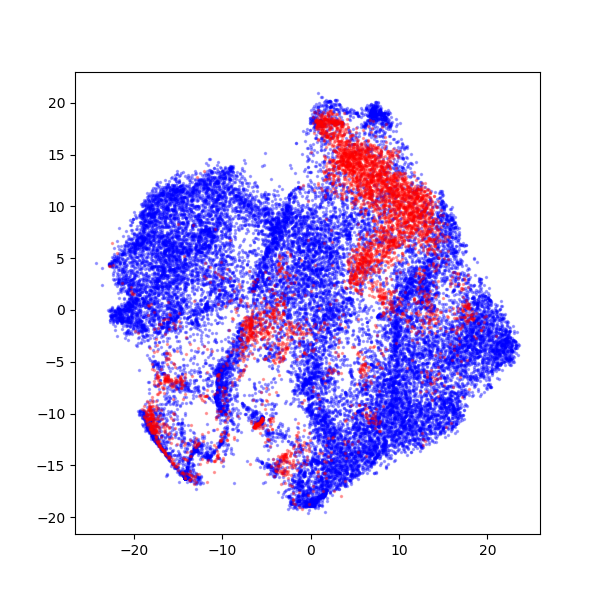

In [49]:
fig = plt.figure(figsize=(6, 6))
for i in range(6):
    idx = np.where(organoid == i)[0]
    if i == 5:
        plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', color='r', alpha=0.3, markersize=3, label=f'Organoid {i+1}')
    else:
        plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', color='b', alpha=0.3, markersize=3, label=f'Organoid {i+1}')
# plt.legend()
plt.show()
# fig.savefig('tsne_3orgs_cytoarchitecture.png')

<IPython.core.display.Javascript object>


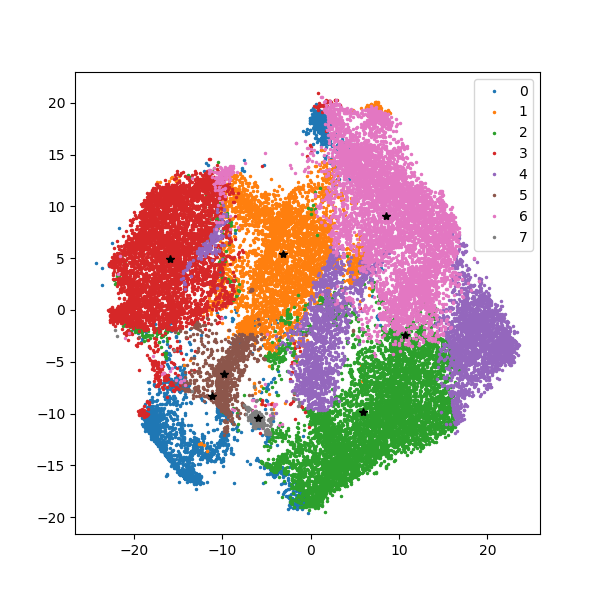

In [50]:
centers = []

fig = plt.figure(figsize=(6, 6))
for i in range(8):
    idx = np.where(labels == i)[0]
    x = x_tsne[idx, 0]
    y = x_tsne[idx, 1]
    xc = x.mean()
    yc = y.mean()
    centers.append([xc, yc])
    plt.plot(x, y, '.', markersize=3, label=str(i))
centers = np.asarray(centers)
plt.plot(centers[:, 0], centers[:, 1], 'k*')
plt.legend()
plt.show()

In [21]:
clusters = ['Non-proximal', 'SOX2 adjacent', 'TBR1 adjacent', 'Intermediates']
clusters = list(range(8))
for i in range(3):
    idx = np.where(labels == i + 1)[0]
    lbls = labels[idx]
    n = len(lbls)
    print(f'Organoid {i+1}')
    for j in range(8):
        count = len(np.where(lbls == j)[0])
        print(f'Cluster {clusters[j]}: {count / n * 100:4.1f}%')
    print('')

Organoid 1
Cluster 0:  0.0%
Cluster 1: 100.0%
Cluster 2:  0.0%
Cluster 3:  0.0%
Cluster 4:  0.0%
Cluster 5:  0.0%
Cluster 6:  0.0%
Cluster 7:  0.0%

Organoid 2
Cluster 0:  0.0%
Cluster 1:  0.0%
Cluster 2: 100.0%
Cluster 3:  0.0%
Cluster 4:  0.0%
Cluster 5:  0.0%
Cluster 6:  0.0%
Cluster 7:  0.0%

Organoid 3
Cluster 0:  0.0%
Cluster 1:  0.0%
Cluster 2:  0.0%
Cluster 3: 100.0%
Cluster 4:  0.0%
Cluster 5:  0.0%
Cluster 6:  0.0%
Cluster 7:  0.0%



<IPython.core.display.Javascript object>


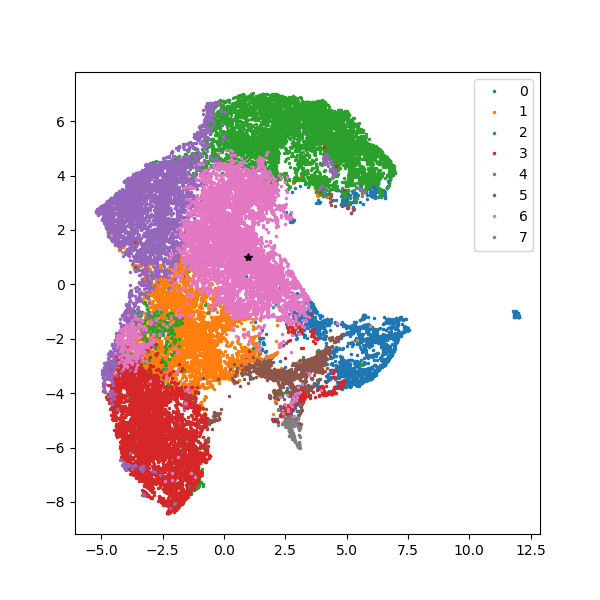

In [41]:
x = 1
y = 1

fig = plt.figure(figsize=(6, 6))
for i in range(8):
    idx = np.where(labels == i)[0]
    plt.plot(x_tsne[idx, 0], x_tsne[idx, 1], '.', markersize=3, label=str(i))
plt.plot(x, y, 'k*')
plt.legend()
plt.show()

In [42]:
from sklearn.neighbors import NearestNeighbors

In [43]:
nbrs = NearestNeighbors(1).fit(x_tsne)

In [44]:
dist, idx = nbrs.kneighbors(np.asarray([[x, y]]))
x_tsne[idx], organoid[idx]

(array([[[0.9927219, 1.0013841]]], dtype=float32), array([[5.]]))

In [45]:
profile = profiles[idx][0, 0]
profile.shape

(3, 5)

<IPython.core.display.Javascript object>


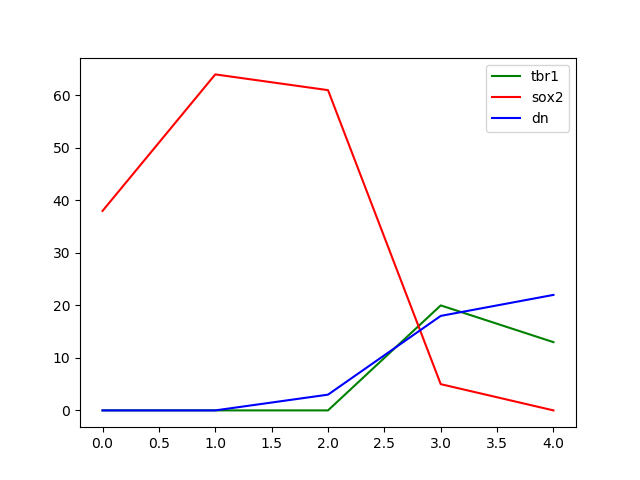

In [46]:
names = ['tbr1', 'sox2', 'dn']
colors = ['g', 'r', 'b']
for i, p in enumerate(profile):
    plt.plot(p, label=names[i], color=colors[i])
plt.legend()
plt.show()